# Getting Started

Welcome to the [`flipnslide`](https://github.com/elliesch/flipnslide) documentation! 

On this page we'll demonstrate a "quick-start" example that will allow you to run `flipnslide` and output a machine learning-ready dataset for immediate use with deep learning algorithms. We'll show you how to use `flipnslide` to download an image from the Earth Observation satellite [Landsat](https://landsat.gsfc.nasa.gov), tile and augment that image according to the Flip-n-Slide strategy (Abrahams et al. 2024), and output the tiled dataset as either a `numpy` array or a `PyTorch` tensor.

We'll start by installing `flipnslide`.

In [1]:
pip install flipnslide --quiet

Note: you may need to restart the kernel to use updated packages.


Now we'll import the `FlipnSlide` tiling method from the `flipnslide` package.

In [1]:
from flipnslide.tiling import FlipnSlide

## Creating a set of tiles from the Planetary Computer Database

To use `flipnslide` to create a dataset of preprocessed, augmented tiles directly from an image we haven't downloaded yet, we need to define two variables: 1) coordinates, and 2) a time range.

The `coordinates` variable should be a list of longitude/lattitude coordinates in decimal degrees that bound the area that you are interested in. The coordinate list should follow the order of `[South, North, East, West]`.

The `time_range` variable should be a string containing the start and end date of the time range that you are interested in. The current version of `flipnslide` will take the time average of all timestamps so as to minimize NaNs, but future versions will output a monthly median.

For the purposes of this example, we'll define an area around New York City, observed in the first two months of 2023.

In [6]:
coords = [40.0378, 41.3878, -73.3310, -74.6810]
time_range = '2023-01-31/2023-02-28'

Let's employ `flipnslide` to create a set of `numpy` tiles from these two variables alone. We'll set the `verbose` flag to `True` so we can see the steps that the algorithm is taking to download and process our image. 

> NOTE: Because we're downloading a large image with many timestamps, this will take a longer time than running `flipnslide` directly on a downloaded image.

Requested image is being downloaded via Planetary Computer...
Initialize the Planetary Computer connection...
Search Planetary Computer for requested image/s...


/home/jovyan/envs/flipnslide-dev/lib/python3.12/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


Stack image/s across time into one image...


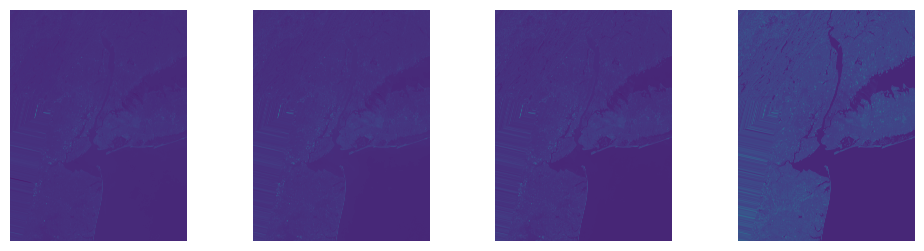

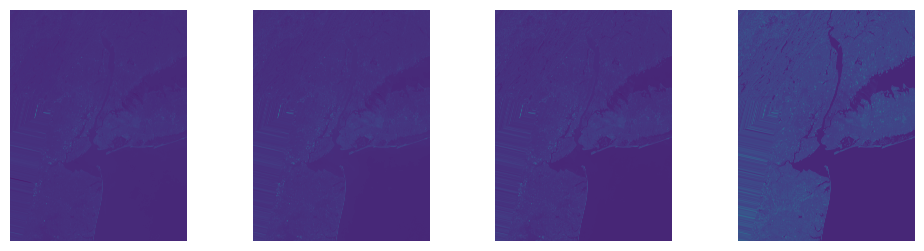

Image is being cropped to a square that is divisible by the tile size...


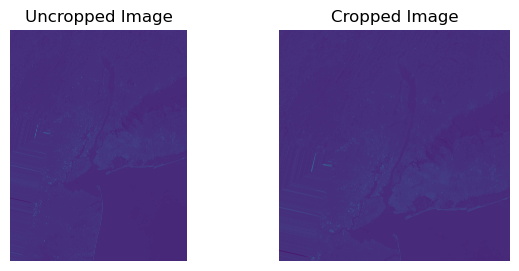

Image is being tiled using the flipnslide approach...


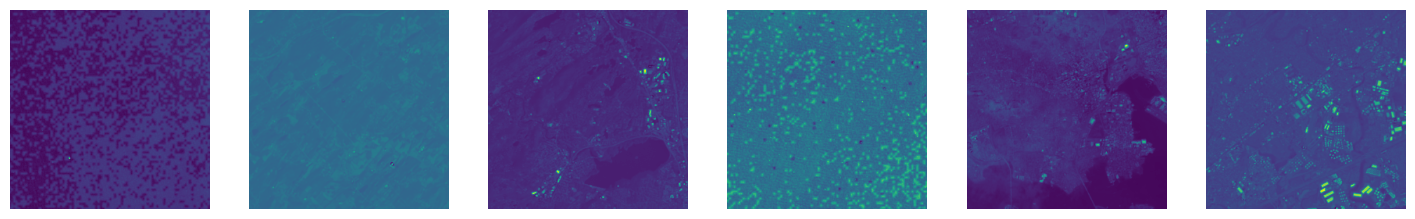

Tiling complete. Access tiles as a '.tiles' attribute.


In [7]:
nyc_tiled = FlipnSlide(data_type='array', verbose=True,
                       coords=coords, time_range=time_range)

We can now access the tiles from our newly tiled dataset through the tiles attribute.

In [8]:
tiles = nyc_tiled.tiles

Let's see the size of the dataset we created.

In [9]:
print(tiles.shape)

(1570, 4, 256, 256)


We can see that we have a dataset of 1,570 tiles that are 256x256 each in 4 color channels.

> NOTE: If you're running into errors when the image is being tiled, make sure that you have defined a coordinate bounding box that is large enough for tiling. Ideally, you'd want the side of your overall image to be at least 10x the size of your output tiles.

Next, let's see how to use `flipnslide` on existing data.

## Running `flipnslide` on Pre-Downloaded Image Data

We can run `flipnslide` directly on a large image, as long as it's a `numpy` nd.array. For the sake of memory space in this tutorial, we'll create a sample image from random `numpy` data.

In [10]:
import numpy as np

In [11]:
sample_image = np.random.rand(3, 5120, 5120)

Once we have our image in memory, we can run `flipnslide`. Let's test creating tiles of size 64x64 to be output as a pytorch tensor, and saved to memory. Since we ran `verbose` when we downloaded our image in the previous section, we'll run this one quietly.

In [12]:
sample_tiled = FlipnSlide(tile_size=64, data_type='tensor',
                          save=True, image=sample_image)

Notice how running this saved a file called `flipnslide_tiles.pt` in your directory. By calling `save=True`, we saved a local copy of our tensor, but if you don't want a local copy, leave out this keyword.

Let's check on the shape of our tiles.

In [15]:
tensor_tiles = sample_tiled.tiles

In [16]:
tensor_tiles.shape

torch.Size([49306, 3, 64, 64])

We can see that our code output a dataset of 49,306 tiles with a size 64x64 and 3 color channels as a `PyTorch` tensor.

Both the `numpy` array from the example using the downloaded image from NYC and the `PyTorch` tensor from this example are ready for immediate use with machine learning algorithms.

## What else can you do with `flipnslide`?

Stay tuned for more advanced examples coming here soon!